# Multi model comparison

In [1]:
import numpy as np
from fmskill.model import ModelResult, ModelResultCollection
from fmskill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [4]:
mr1 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='SW_1')
mr2 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2')

## Collection of model results

In [5]:
mrc = ModelResultCollection([mr1, mr2])

In [6]:
mrc.add_observation(o1, item=0)
mrc.add_observation(o2, item=0)
mrc.add_observation(o3, item=0)
mrc.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

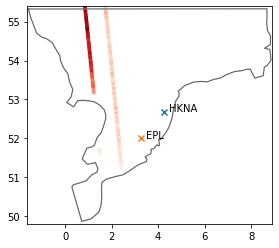

In [7]:
mrc.plot_observation_positions();

In [8]:
cc = mrc.extract()    # returns a collection of comparisons

In [9]:
cc["EPL"]   # select a single comparer from the collection like this

<PointComparer>
Observation: EPL, n_points=66
 Model: SW_1, rmse=0.216
 Model: SW_2, rmse=0.226

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()

In [10]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model observation                                                          
SW_1  EPL           66 -0.075335  0.216357  0.202817  0.183641  0.972467   
      HKNA         385 -0.195266  0.352283  0.293214  0.251992  0.971082   
      c2           113 -0.001210  0.351796  0.351794  0.294585  0.974335   
SW_2  EPL           66 -0.007782  0.225996  0.225862  0.193719  0.972467   
      HKNA         385 -0.101189  0.293247  0.275235  0.214476  0.971082   
      c2           113  0.081431  0.430268  0.422492  0.357138  0.974335   

                         si        r2  
model observation                      
SW_1  EPL          0.073902  0.934093  
      HKNA         0.088488  0.904815  
      c2           0.118511  0.899507  
SW_2  EPL          0.082298  0.928089  
      HKNA         0.083062  0.934045  
      c2           0.142327  0.849675

In [11]:
cc.skill(observation="c2")

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,c2,113,-0.001210,0.351796,0.351794,0.294585,0.974335,0.118511,0.899507
SW_2,c2,113,0.081431,0.430268,0.422492,0.357138,0.974335,0.142327,0.849675


In [12]:
cc.mean_skill(model=0, observation=[0,"c2"])

,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
SW_1,498,-0.098238,0.35204,0.322504,0.273288,0.972708,0.103499,0.902161


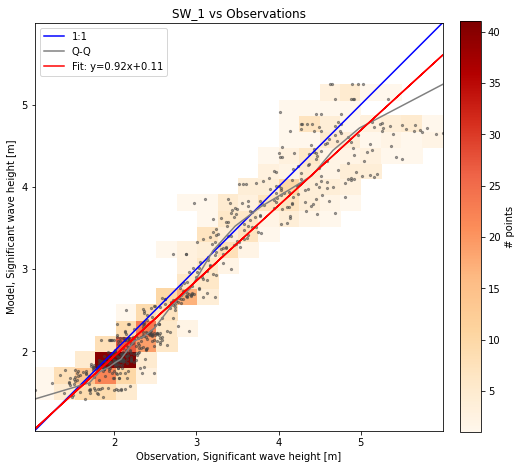

In [13]:
cc.scatter(model='SW_1', cmap='OrRd')

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

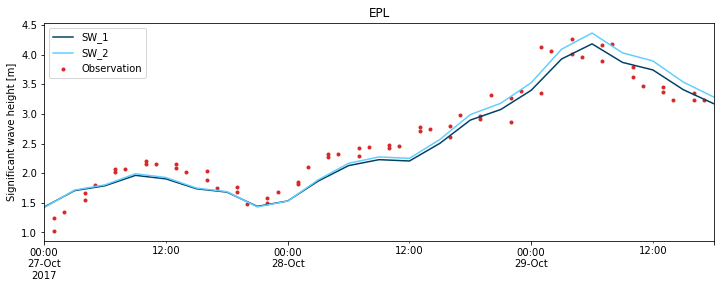

In [14]:
cc['EPL'].plot_timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [15]:
cc.skill(model="SW_1", end='2017-10-28')

,model,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
EPL,SW_1,48,-0.110532,0.227094,0.198379,0.193293,0.932614,0.087529,0.828884
HKNA,SW_1,281,-0.098125,0.203006,0.177716,0.164239,0.969014,0.067014,0.917713
c2,SW_1,72,-0.188193,0.313787,0.251089,0.258661,0.478554,0.122423,-1.420894


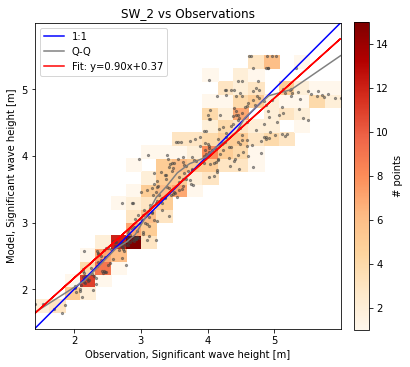

In [16]:
cc.scatter(model='SW_2', start='2017-10-28', cmap='OrRd', figsize=(6,7))

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [17]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

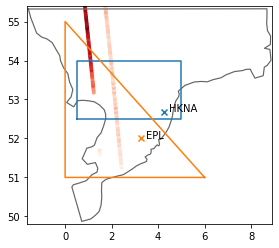

In [18]:
ax = mrc.plot_observation_positions();
ax.plot([bbox[0],bbox[2],bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3],bbox[1]]);
ax.plot(polygon[:,0],polygon[:,1]);

In [19]:
cc.skill(model="SW_1", area=bbox)

,model,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
HKNA,SW_1,385,-0.195266,0.352283,0.293214,0.251992,0.971082,0.088488,0.904815
c2,SW_1,42,-0.055870,0.388404,0.384365,0.336023,0.952688,0.139796,0.749645


In [20]:
cc.scatter(model="SW_2", area=polygon, backend='plotly')

## Skill object

The skill() and mean_skill() methods return a skill object that can visualize results in various ways. The primary methods of the skill object are:

* style()
* plot_bar()
* plot_line()
* plot_grid()
* sel()

In [21]:
s = cc.skill()

In [22]:
s.style()

In [23]:
s.style(columns='rmse')

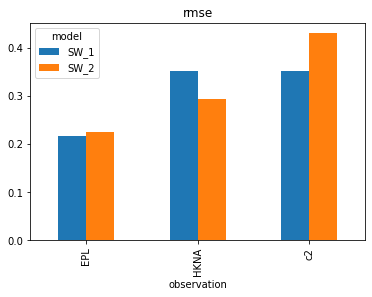

In [24]:
s.plot_bar('rmse');

In [25]:
s = cc.skill(by=['model','freq:12H'], metrics=['bias','rmse','si'])

In [26]:
s.style()

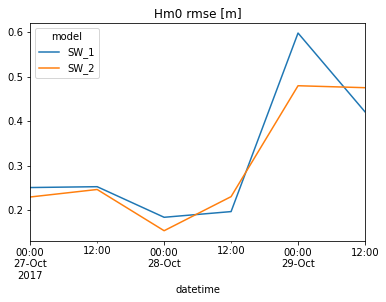

In [27]:
s.plot_line('rmse', title='Hm0 rmse [m]');

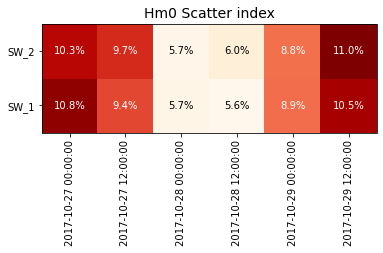

In [28]:
s.plot_grid('si', fmt='0.1%', title='Hm0 Scatter index');

### The sel() method can subset the skill object 

A new skill object will be returned

In [29]:
s = cc.skill()
s.style()

In [30]:
s.sel(model='SW_1').style()

,model,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
EPL,SW_1,66,-0.075,0.216,0.203,0.184,0.972,0.074,0.934
HKNA,SW_1,385,-0.195,0.352,0.293,0.252,0.971,0.088,0.905
c2,SW_1,113,-0.001,0.352,0.352,0.295,0.974,0.119,0.900


In [31]:
s.sel(observation='HKNA').style()

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,HKNA,385,-0.195,0.352,0.293,0.252,0.971,0.088,0.905
SW_2,HKNA,385,-0.101,0.293,0.275,0.214,0.971,0.083,0.934


In [32]:
s.sel('rmse>0.25').style()

In [33]:
s.sel('rmse>0.3', columns=['rmse','mae']).style()